In [1]:
from terminal_optimization import objects
from terminal_optimization import defaults
from terminal_optimization import system

# 0. Prepare inputs

## 0.1 Generate demand forecast scenario

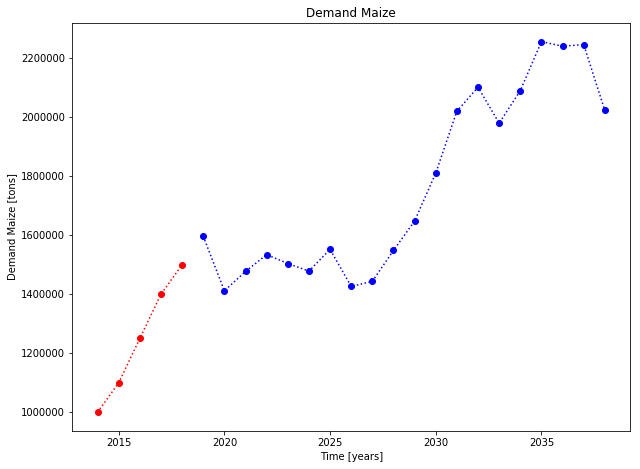

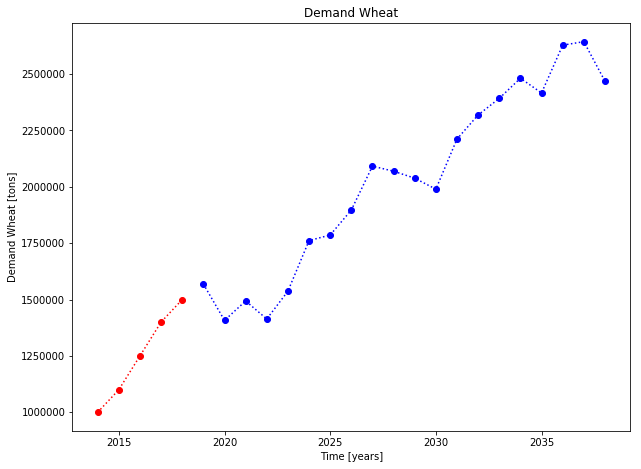

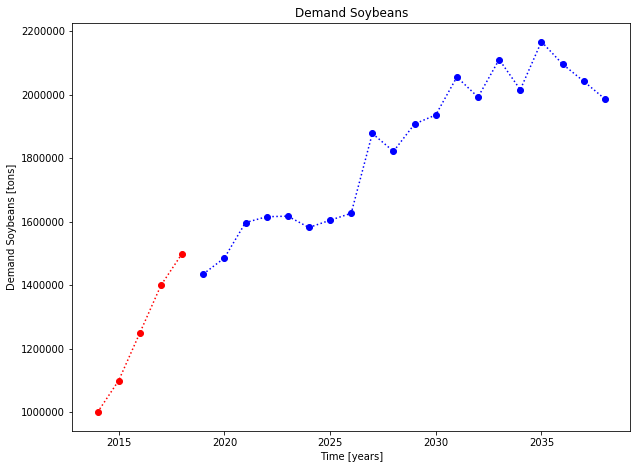

In [2]:
# instantiate a commodity object
maize = objects.Commodity(**defaults.maize_data)
wheat = objects.Commodity(**defaults.wheat_data)
soybeans = objects.Commodity(**defaults.soybean_data)

# create a future througput scenario
maize.scenario_random()
wheat.scenario_random()
soybeans.scenario_random()

cargo = [maize, wheat, soybeans]

# plot scenarios
if True:
    maize.plot_demand()
    wheat.plot_demand()
    soybeans.plot_demand()

## 0.2 Generate vessels

In [3]:
# instantiate vessels
handysize = objects.Vessel(**defaults.handysize_data)
handymax = objects.Vessel(**defaults.handymax_data)
panamax = objects.Vessel(**defaults.panamax_data)

vessels = [handysize, handymax, panamax]

# 1. Instatiate terminal system

In [4]:
# instantiate System object
Terminal = system.System(elements = cargo + vessels)

# 2. Start simulation
Develop terminal given the throughput scenario and investment triggers implemented

In [5]:
Terminal.simulate()


Simulate year: 2019
  Total vessel calls: 100
     Handysize calls: 44
     Handymax calls: 31
     Panamax calls: 25
  Total cargo volume: 4600529
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned

  Start analysis:
     Berth occupancy (@ start of year): inf
  *** add Berth to elements
     Berth occupancy (after adding berth): inf
  *** add Quay to elements
     Berth occupancy (after adding quay): inf
  *** add Harbour crane to elements
     Berth occupancy (after adding crane): 2.3129387973137976
  *** add Harbour crane to elements
     Berth occupancy (after adding crane): 1.1885206807081807
  *** add Harbour crane to elements
     Berth occupancy (after adding crane): 0.8137146418396418
  *** add Berth to elements
     Berth occupancy (after adding berth): 0.8137146418396418
  *** add Quay to elements
     Berth occupancy (after adding qu

## Report all elements

In [6]:
for element in Terminal.elements:
    print("")
    print(element.name)
    print("")
    print(element.__dict__)


Maize

{'historic_data':    year   volume
0  2014  1000000
1  2015  1100000
2  2016  1250000
3  2017  1400000
4  2018  1500000, 'scenario_data':     year   volume
0   2019  1596391
1   2020  1411538
2   2021  1477130
3   2022  1534290
4   2023  1504052
5   2024  1478328
6   2025  1552110
7   2026  1426239
8   2027  1443744
9   2028  1548359
10  2029  1647940
11  2030  1810417
12  2031  2019968
13  2032  2101500
14  2033  1979540
15  2034  2089890
16  2035  2255900
17  2036  2240386
18  2037  2245866
19  2038  2022733, 'handling_fee': 3, 'handysize_perc': 50, 'handymax_perc': 50, 'panamax_perc': 0, 'name': 'Maize', 'id': 'c9fbf136-48d3-11e9-8790-60f677ba2ce0'}

Wheat

{'historic_data':    year   volume
0  2014  1000000
1  2015  1100000
2  2016  1250000
3  2017  1400000
4  2018  1500000, 'scenario_data':     year   volume
0   2019  1568755
1   2020  1407461
2   2021  1493610
3   2022  1413653
4   2023  1537015
5   2024  1761380
6   2025  1786052
7   2026  1896931
8   2027  2091692
9   2

## Add a supply chain graph
The graph should be useable to detect if all elements of the supplychain are in place. 
Only when a path through the supply chain is available can revenue be obtained. 
This is still an experimental functionality and not yet fully implemented. 

In [7]:
# *** specify supply chain logic
# 1. create object types
quay = objects.Quay_wall(**defaults.quay_wall_data)
berth = objects.Berth(**defaults.berth_data)
crane = objects.Cyclic_Unloader(**defaults.gantry_crane_data)
screw = objects.Continuous_Unloader(**defaults.continuous_screw_data)
conveyor1 = objects.Conveyor(**defaults.quay_conveyor_data)
storage = objects.Storage(**defaults.silo_data)
conveyor2 = objects.Conveyor(**defaults.hinterland_conveyor_data)
unloading_station = objects.Unloading_station(**defaults.hinterland_station_data)

# 2. specify nodes and edges
nodes = [quay, berth, crane, screw, conveyor1, storage, conveyor2, unloading_station]
edges = [[quay, berth],
         [berth, crane],
         [berth, screw],
         [crane, conveyor1],
         [screw, conveyor1],
         [conveyor1, storage],
         [storage, conveyor2],
         [conveyor2, unloading_station]]

# 3. invoke the supply_chain method
Terminal.supply_chain(nodes, edges)